In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

pd.set_option('display.precision', 4)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
np.set_printoptions(formatter={'all': lambda x: '%.4f' % x})

%matplotlib inline

In [2]:
# dataset = pd.read_csv('./data/usa-housing-modified.csv')

# dataset['Avg_Area_Income'] = (
#     dataset['Avg_Area_Income'] - dataset['Avg_Area_Income'].mean()
# ) / dataset['Avg_Area_Income'].std()
# dataset['Area_Population'] = (
#     dataset['Area_Population'] - dataset['Area_Population'].mean()
# ) / dataset['Area_Population'].std()
# # dataset['Price'] = (
# #     dataset['Price'] - dataset['Price'].mean()
# # ) / dataset['Price'].std()

In [3]:
# x = dataset[['Avg_Area_Income', 'Area_Population']].to_numpy()
# y = dataset[['Price']].to_numpy()

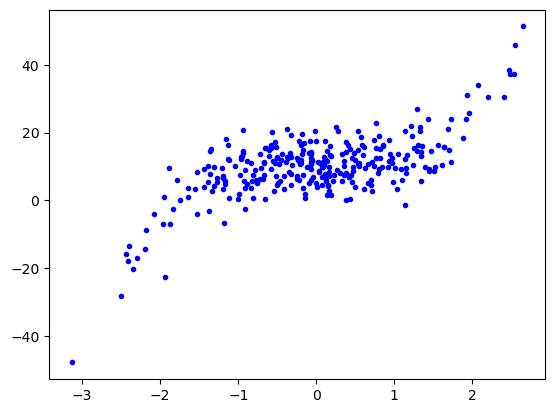

In [4]:
np.random.seed(8)
x = np.random.randn(300, 1)
y = 2*(x**3) + 10 + 5 * np.random.randn(300,1)

plt.plot(x, y, 'b.')
plt.show()

In [5]:
tmp_x = np.column_stack((np.ones(x.shape[0]), x))
    
calc_theta = lambda x, y: np.linalg.inv(x.T @ x) @ x.T @ y

thetas_lineal = calc_theta(tmp_x, y)
print(thetas_lineal.flatten())

[10.1596 6.0495]


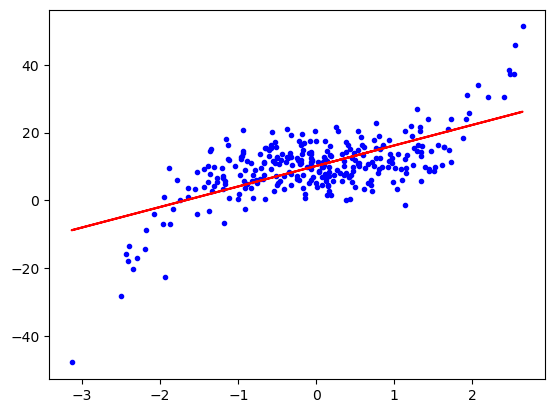

In [6]:
# thetas_lineal.shape, tmp_x.shape
plt.plot(x, y, 'b.')
plt.plot(x, tmp_x@thetas_lineal, 'r-')
plt.show()

In [9]:
def calc_weights_matrix(point, X, tau): 
    size = X.shape[0]
    w = np.mat(np.eye(size))
    for i in range(size): 
        xi = X[i] 
        d = (-2 * tau * tau) 
        w[i, i] = np.exp(np.dot((xi-point), (xi-point).T)/d) 
    return w

def predict(X, y, point, tau): 
    size = X.shape[0] 
    X_ = np.append(X, np.ones(size).reshape(size,1), axis=1) 
    point_ = np.array([point, 1]) 
    w = calc_weights_matrix(point_, X_, tau) 
    theta = np.linalg.pinv(X_.T*(w * X_))*(X_.T * (w * y)) 
    pred = np.dot(point_, theta) 
    return theta, pred

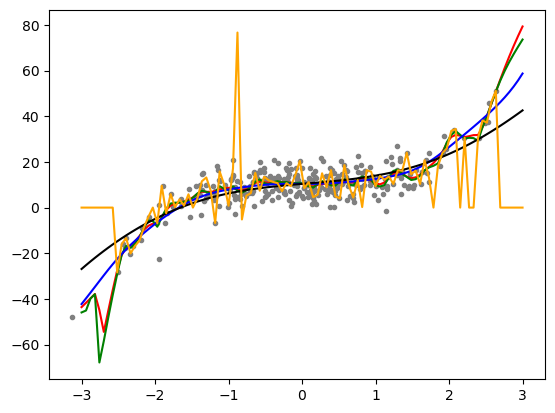

In [10]:
def plot_predictions(X, y, tau, nval):
    X_test = np.linspace(-3, 3, nval) 
    preds = [] 
    for point in X_test: 
        theta, pred = predict(X, y, point, tau) 
        preds.append(pred)
        
    X_test = np.array(X_test).reshape(nval,1)
    preds = np.array(preds).reshape(nval,1)
    return X_test, preds

x1, y1 = plot_predictions(x, y, 0.08, 100)
x2, y2 = plot_predictions(x, y, 0.05, 100)
x3, y3 = plot_predictions(x, y, 0.4, 100)
x4, y4 = plot_predictions(x, y, 1, 100)
x5, y5 = plot_predictions(x, y, 0.001, 100)

plt.plot(x, y, '.', color='gray')
plt.plot(x1, y1, 'r')
plt.plot(x2, y2, 'g')
plt.plot(x3, y3, 'b')
plt.plot(x4, y4, color='black')
plt.plot(x5, y5, color='orange')
plt.show()


In [ ]:
from typing import Callable

def aprox_lineal_quadratica_gd_quad(
    x: np.ndarray,
    y: np.ndarray,
    fn: Callable,
    grad_fn: Callable,
    error:float = 0.001,
    max_iters=10000
):
    tmp_x = np.column_stack((np.ones(x.shape[0]), x))
    return